In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0

--2021-07-06 04:27:00--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-07-06 04:27:01--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc417c6ba29c0be21570c4678a4f.dl.dropboxusercontent.com/cd/0/inline/BRwhvkfRL0uW4cpmCryUceDJcn37wrYc_am5yFp_KyEyeZAcv2Z2g-jFxp7SjfNsMN8IYYv8889f1gBP0ghEYBpWVBGdmm3bZ8yq-HYzqpjxw3KbeFlXCnW_IDFwKwMu4TO5HM9cYalhuFvXFB9j4u63/file# [following]
--2021-07-06 04:27:01--  https://uc417c6ba29c0be21570c4678a4f.dl.dropboxusercontent.com/cd/0/inline/BRwhvkfRL0uW4cpmCryUceDJcn37wrYc_am5yFp_KyEyeZAcv2Z2g-jFxp7SjfNsMN8

In [ ]:
!unzip /content/BrainTumorData.zip?d1=0

Archive:  /content/BrainTumorData.zip?d1=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math 
import shutil
import glob 

In [ ]:
#brain tumor - 1 
ROOT_DIR = "/content/BrainTumorData/Brain Tumor Data Set"
number_of_images ={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] =len(os.listdir(os.path.join(ROOT_DIR,dir)) )
  
number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

In [ ]:
number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

In [ ]:
def dataFolder(p,split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
       os.makedirs("./"+p+"/"+dir)
       for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size =(math.floor(split*number_of_images[dir])-5),replace=False ):

        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)

  else:
      print(f"{p}  folder exist")
      

In [ ]:
dataFolder("train",0.7)


In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

In [ ]:
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet,preprocess_input

In [ ]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function=preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),batch_size = 32, class_mode ='binary')

  return image

In [ ]:
path ="/content/train"

train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [ ]:
def preprocessingImages2(path):

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224),batch_size = 32, class_mode ='binary')

  return image


In [ ]:
path ="/content/test"

test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path ="/content/val"

val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Flatten , Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet,preprocess_input
import keras

from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator


In [ ]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape = (224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()
 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)      

In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=1,activation='sigmoid')(X)


model = Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
model.compile(optimizer='rmsprop',loss =keras.losses.binary_crossentropy,metrics=['accuracy'])


In [ ]:
## CALL BACK 

from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="bestofbestmodel.h5",monitor='val_accuracy',verbose = 1 , save_best_only=True)

# Early Stopping 

es = EarlyStopping(monitor="val_accuracy",min_delta = 0.01, patience = 3 ,verbose = 1)

cb = [mc,es]

In [ ]:
hist = model.fit_generator(train_data,
                    steps_per_epoch=8,
                    epochs=30,
                    validation_data=val_data,
                    validation_steps=16,
                    callbacks=cb)

Epoch 1/30
8/8 [==============================] - 53s 883ms/step - loss: 8.4876 - accuracy: 0.5844 - val_loss: 2.7199 - val_accuracy: 0.7129

Epoch 00001: val_accuracy improved from -inf to 0.71289, saving model to bestofbestmodel.h5
Epoch 2/30
8/8 [==============================] - 5s 664ms/step - loss: 2.8537 - accuracy: 0.6907 - val_loss: 0.7046 - val_accuracy: 0.8809

Epoch 00002: val_accuracy improved from 0.71289 to 0.88090, saving model to bestofbestmodel.h5
Epoch 3/30
8/8 [==============================] - 5s 644ms/step - loss: 1.4751 - accuracy: 0.8090 - val_loss: 1.0540 - val_accuracy: 0.8604

Epoch 00003: val_accuracy did not improve from 0.88090
Epoch 4/30
8/8 [==============================] - 5s 643ms/step - loss: 1.0525 - accuracy: 0.8840 - val_loss: 0.4746 - val_accuracy: 0.9117

Epoch 00004: val_accuracy improved from 0.88090 to 0.91170, saving model to bestofbestmodel.h5
Epoch 5/30
8/8 [==============================] - 5s 649ms/step - loss: 0.6476 - accuracy: 0.8830 

In [ ]:
model = load_model("/content/bestofbestmodel.h5")

In [ ]:
#acc = model.evaluate_generator(test_data)[1]

#print(f"our model accuracy is {acc*100} % ")

In [ ]:
h = hist.history

h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

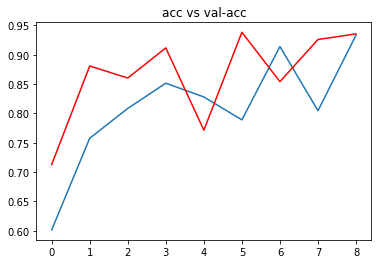

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')
plt.title("acc vs val-acc")
plt.show()

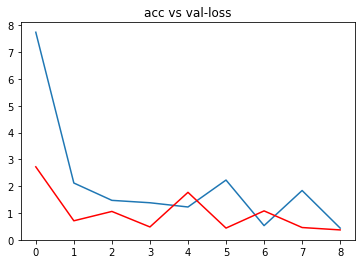

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title("acc vs val-loss")
plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import keras


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


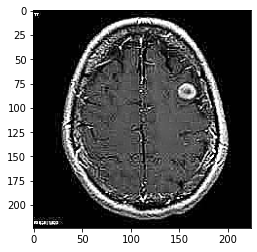

CT scan showed tumors in the brain, there may be brain cancer 


In [ ]:
path ="/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (2163).jpg"

#img = image.load_img(path,target_size=(224,224))

#i = image.img_to_array(img)
#i = preprocess_input(i)
#input_arr =np.array([i])
#input_arr.shape

pred = np.argmax(model.predict(input_arr))

img =load_img(path,target_size=(224,224))
input_arr =img_to_array(img)/225

plt.imshow(input_arr)
plt.show()


input_arr.shape



input_arr = np.expand_dims(input_arr,axis=0)

pred = model.predict_classes(input_arr)[0][0]
pred


if pred ==0:
  print("CT scan showed tumors in the brain, there may be brain cancer ")

else:
  print("CT scan showed no tumors in the brain and no possibility of brain cancer ")



